In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean, cityblock
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegressionCV
from collections import defaultdict
from scipy.optimize import curve_fit

raw = pd.read_csv('METABRIC_RNA_Mutation.csv', low_memory=False)

# Prediction of Survival Rate of Breast Cancer Patients Using Gene Expression Profile (METABRIC)

- background about breast cancer, what is it, 
- how many people have breast cancer
- who are suceptibe

Cancer is the uncontrolled growth of abnormal cells in the body. Cancer develops when the body's normal control mechanism stops working. Old cells do not die and instead grow out of control, forming new, abnormal cells. These extra cells may form a mass of tissue, called a tumor [1]. Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Non-cancerous breast tumors are abnormal growths, but they do not spread outside of the breast. They are not life threatening, but some types of benign breast lumps can increase a woman's risk of getting breast cancer. Breast cancers can start from different parts of the breast.[2]. One of the most commonly diagnosed cancers worldwide was breast cancer, which accounts 1.7 million of the total, 521,900 deaths (IARC, 2013).

**How Common is Breast Cancer**
Breast cancer is the most common cancer in American women, except for skin cancers. Currently, the average risk of a woman in the United States developing breast cancer sometime in her life is about 13%. This means there is a 1 in 8 chance she will develop breast cancer. This also means there is a 7 in 8 chance she will never have the disease. In recent years, incidence rates have increased slightly (by 0.3% per year). Breast cancer is the second leading cause of cancer death in women (only lung cancer kills more women each year). The chance that a woman will die from breast cancer is about 1 in 38 (about 2.6%). In most countries, breast cancer is among the main causes of death in women (Fitzmaurice et al., 2015).

**Types of Breast Cancer**
There are many different types of breast cancer and common ones include ductal carcinoma in situ (DCIS) and invasive carcinoma. Others, like phyllodes tumors and angiosarcoma are less common. Once a biopsy is done, breast cancer cells are tested for proteins called estrogen receptors, progesterone receptors and HER2. The tumor cells are also closely looked at in the lab to find out what grade it is. The specific proteins found and the tumor grade can help decide treatment options.

**How Breast Cancer Starts**
Changes or mutations in DNA can cause normal breast cells to become cancer. Certain DNA changes are passed on from parents (inherited) and can greatly increase your risk for breast cancer. Other lifestyle-related risk factors, such as what you eat and how much you exercise, can increase your chance of developing breast cancer, but it’s not yet known exactly how some of these risk factors cause normal cells to become cancer. Hormones seem to play a role in many cases of breast cancer, but just how this happens is not fully understood.

But most DNA mutations linked to breast cancer are acquired. This means the change takes place in breast cells during a person's life rather than having been inherited or born with them. Acquired DNA mutations take place over time and are only in the breast cancer cells.

Mutated DNA can lead to mutated genes. Some genes control when our cells grow, divide into new cells, and die. Changes in these genes can cause the cells to lose normal control and are linked to cancer.

**Sgns and Symptom**
The most common symptom of breast cancer is a new lump or mass. A painless, hard mass that has irregular edges is more likely to be cancer, but breast cancers can be tender, soft, or round. They can even be painful. For this reason, it's important to have any new breast mass, lump, or breast change checked by an experienced health care professional.

Other possible symptoms of breast cancer include:

- Swelling of all or part of a breast (even if no lump is felt)
- Skin dimpling (sometimes looking like an orange peel)
- Breast or nipple pain
- Nipple retraction (turning inward)
- Nipple or breast skin that is red, dry, flaking or thickened
- Nipple discharge (other than breast milk)
- Swollen lymph nodes (Sometimes a breast cancer can spread to lymph nodes under the arm or around the collar bone and cause a lump or swelling there, even before the original tumor in the breast is large enough to be felt.)

**How Breast Cancer Spreads**
Breast cancer can spread when the cancer cells get into the blood or lymph system and are carried to other parts of the body. he lymph system is a network of lymph (or lymphatic) vessels found throughout the body that connects lymph nodes (small bean-shaped collections of immune system cells). The clear fluid inside the lymph vessels, called lymph, contains tissue by-products and waste material, as well as immune system cells. The lymph vessels carry lymph fluid away from the breast. In the case of breast cancer, cancer cells can enter those lymph vessels and start to grow in lymph nodes. Most of the lymph vessels of the breast drain into [2]:

 - Lymph nodes under the arm (axillary nodes)
 - Lymph nodes around the collar bone (supraclavicular [above the collar bone] and infraclavicular [below the collar bone] lymph nodes)
 - Lymph nodes inside the chest near the breast bone (internal mammary lymph nodes)

If cancer cells have spread to your lymph nodes, there is a higher chance that the cells could have traveled through the lymph system and spread (metastasized) to other parts of your body. The more lymph nodes with breast cancer cells, the more likely it is that the cancer may be found in other organs [2].

**Survival Rates**
The American Cancer Society relies on information from the SEER* database, maintained by the National Cancer Institute (NCI), to provide survival statistics for different types of cancer.

The urveillance, Epidemiology, and End Results (SEER) database tracks 5-year relative survival rates for breast cancer in the United States, based on how far the cancer has spread. The SEER database, however, does not group cancers by AJCC TNM stages  (stage 1, stage 2, stage 3, etc.). Instead, it groups cancers into localized, regional, and distant stages [2]:

Localized: There is no sign that the cancer has spread outside of the breast.
Regional: The cancer has spread outside the breast to nearby structures or lymph nodes.
Distant: The cancer has spread to distant parts of the body such as the lungs, liver or bones.

5-year relative survival rates for breast cancer
(Based on women diagnosed with breast cancer between 2009 and 2015.)

**Survival Analysis**
Several studies has been done in survival data analysis using parametric and Semi-parametric survival models (Alizadeh et al., 2013; Hashemian et al., 2013; Vallinayagam et al., 2014; Pourhoseingholi et al., 2011 & Zare et al., 2013). As results from such studies shows. the parametric survival models performing better than Semi-parametric model.
The Weibull model is most favorable for survival data analysis among different AFT models (Klein & Moeschberger, 1997). This was justified by study done using data on breast cancer cases by Ahmad et al. (2015) and Baghestani et al. (2015), which indicates that the Weibull model was chosen over different parametric models.
A study by Hoang (2014) on survival analysis of breast cancer patients, using Weibull model, revealed that age, stage of cancer, treatment by only surgery, treatment by both surgery and radiation has effect on patients’ survival time.

The women having higher tumor size have low survival time. The women, who go for treatment into the hospital at the later stage, have low survival time.[3] 

Under uni-variable analysis the Weibull AFT model shows that age, alcohol consumption, family history of breast cancer, breast feeding, oral contraceptives,recurrence, tumor size, histologic grade, treatments taken and stages of breast cancer were significantly associated with survival time of women with breast cancer patients at 5% level of significance. [3]. F

rom result of multivariable analysis of Weibull AFT model the survival time of woman with breast cancer patients significantly affected by age, oral contraceptives, alcohol consumption, breast feeding, tumor size, histologic grade and stages of breast cancer [3].

**Survival of patients**
The main cause of death is metastasis. [2] About
half of the population will have recurrence or
metastasis after surgery. If we can give adjuvant
treatment to breast cancer patients with poor prognosis
as soon as possible, the survival rate of those patients
will be greatly improved. The prognosis of cancer is
usually very difficult, so that there are many
uncertainties when doctors choose drugs or therapies.
[3] If the risk levels of patients can be distinguished, it
can play a positive role in guiding the treatment
program. [4]
In the beginning, genetic data are often used in cancer
classification. [5] Then, researchers found that genetic
data can be treated as predictors to analyze the
survival time and prognostic risk of cancer patients.
Studies on breast cancer have shown that gene
expression variables can replace clinical indicators
such as gender, age and history to analyze the
prognosis of breast cancer patients.

**Stacking ensemble**

With single classifiers, SVM has achieved the
highest performance on ACC and TPR, while
XGboost had the best performance on AUC. With
stacking models, s-SVM has achieved the highest
performance on ACC and TPR, while s-LR had the
best performance on AUC.
We found that performance increased when each
method was used as the second layer (meta-model).
This proves that when predicting breast cancer
prognosis (or even other cancers) based on microarray
data, the single classifier might not give reliable
results. Thus, combining multiple classifiers using
ensemble learning may produce better results..

**5-yer survival  time SEER data**
the purpose of this research is to study the performance of the decision tree and logistic regression for predicting 5-year survivability of breast cancer patients based on SEER database (2010) which covers most current records [8]. In addition, logistic regression has a better performance than the decision tree which is inconsistent with the results of Delen et al.(2005), when considering from the perspective of g-mean and AUC. 

**Data Mining techniques**
Figure 1 shows the ranked survivability
attributes of our data as calculated by the Weka
toolkit. It clearly shows that Extension of Tumor has
a higher rank than the Tumor Size[9]. 

**Gene expresion**[10]
Gene expression pattern analysis offers ways to improve the diagnosis and classification of risk for many cancers (11, 12).Gene expression data have the potential to prevent errors caused by fatigue and impatience of oncology experts in survival estimation. Analyzing such a data by using machine-learning techniques leads to developing clinical decision support sys-tems for the correct estimation of survival time and so provides proper treatments to patients according to their survival. Several genes and proteins with abnormal func-tion and expression contribute to the cancer de-velopment and its pathogenesis (9, 16, 17). G

ene expression measures the level of gene activity in a tissue and thus gives information about the com-plex activities of cells. This data usually obtain by measuring the activation and function of genes during their translation. Since cancers are asso-ciated with genetic abnormalities, gene expression data can display these abnormalities.

Often oncologists face the difficult tasks of prognosis and survival in patients with incurable malignancy. Their assessments in these cases are based on clinical experience and com-prehensive knowledge of patients. But, such pre-dictions with 20% to 60% accuracy, are largely unreliable, inaccurate and usually more optimistic.

When physi-cians have a good understanding of their patients’ prognosis, patients likely receive less invasive care (8, 16, 25).Hence, in the medical decision-making process, the ability of physician to formu-late a correct estimation of survival among pa-tients with advanced and incurable cancers is ne-cessary (24, 26). The levels of gene expression definitely asso-ciated with overall survival of cancer patients (9). There are a high association between gene ex-pression levels and survival and various studies have indicated the power of this type of data than clinical data and other prognostic factors (21, 27).The superiority of gene expression data was demonstrated in providing individualized and right treatments in malignant patients (28, 30-33). Analysis of gene profiles is helpful to improve the accuracy of survival estimation and histopathological classification (28).

According to the cancer priority as one of the important health issues in the world that imposes mortality and costs, there is an urgent need for survival prediction strategies. One of the main goals in cancer patients is the estimation of sur-vival. It leads to better management, optimal uses of resources and providing individualized treat-ments (1, 3).

Chang et al. showed the improvement in classifi-cations of breast cancer by using decision tree analysis (31). Other studies mentioned the high precision and low cost of Bayesian Model tech-niques in survival prediction of Mantle Cell Lym-phoma (30). In addition, Guo et al. using the Random committee and Bayesian belief networks on Lung adenocarcinomas showed the capacity of these algorithms in the true prediction of pa-tient outcomes (42).

[1] https://www.cancercenter.com/what-is-cancer#:~:text=Cancer%20is%20the%20uncontrolled%20growth,of%20tissue%2C%20called%20a%20tumor.<br>
[2] https://www.cancer.org/cancer/breast-cancer/about/what-is-breast-cancer.html
[3] Determinants of Survival Time of Women with
Breast Cancer, M.K. Sharma, Endalkachew Abebe, Archives of Oncology and Cancer Therapy, ISSN: 2638-5074, Volume 2, Issue 2, 2019, PP: 26-39
[4] Stewart BW. & Wild CP. (2014) [40] World Cancer Report; 3rd edition. IARC, France.
[5] Fitzmaurice C., Dicker D., & Pain A. (2015) ‘The [18] Global Burden of Cancer 2013. JAMA Oncol, 1, 505-27.
[6] Survival of patients with metastatic breast cancer: twenty-year data
from two SEER registries, Patricia Tai*1, Edward Yu2, Vincent Vinh-Hung3, Gábor Cserni4 and
Georges Vlastos5, Published: 02 September 2004, BMC Cancer 2004, 4:60 doi:10.1186/1471-2407-4-60
[7] Using stacking ensemble to Predict Survival
in Breast Cancer based on microarray dataset
[8] OPTIMAL DATA MINING METHOD FOR PREDICTING BREAST CANCER SURVIVABILITY, International Journal of Innovative Management, Information & Production, Volume 4, Number 2, Dec 2013, KUNG-MIN WANG1, BUNJIRA MAKOND2, WEI-LI WU3, K.-J. WANG4, Y. S. LIN5, 
[9] Predicting Breast Cancer Survivability
Using Data Mining Techniques, Abdelghani Bellaachia, Erhan Guven, Department of Computer Science
The George Washington University
[10]Improving the Prediction of Survival in Cancer Patients by Using Machine Learning Techniques: Experience of Gene Expression Data: A Narrative Review, Azadeh BASHIRI, *Marjan GHAZISAEEDI, Reza SAFDARI, Leila SHAHMORADI, Hamide EHTESHAM, Iran J Public Health, Vol. 46, No.2, Feb 2017, pp.165-172

## 1 Abstract

In [177]:
data2.columns

## 2 Introduction

## 3 Methodology

## 4 Implementation

In [19]:
# raw.columns.to_list()

**Remove Patients Died from Other Causes**

In [130]:
def pre_process(df):
    """Performs all pre-processing steps including imputation, mapping and
    log-transformation."""
    
    df = raw[raw['death_from_cancer'] != 
             'Died of Other Causes'].iloc[:, :515].copy()                           ## remove patients died from other causes
    df.drop(columns=['death_from_cancer'], inplace=True)

    ## remove irrelevant and redundant features
    df.drop(columns=['patient_id', 'cancer_type', 
                     'er_status_measured_by_ihc', 'her2_status'], inplace=True)

    ## map cellularity
    cellularity_map = {'High': 3, 'Moderate': 2, 'Low': 1}
    df['cellularity'] = df['cellularity'].map(cellularity_map)

    ## impute missing values
    df['neoplasm_histologic_grade'].fillna(
        df['neoplasm_histologic_grade'].value_counts().index[0], inplace=True)     ## most frequent
    df['mutation_count'].fillna(df['mutation_count'].value_counts().index[0],
                                inplace=True)
    df['tumor_size'].fillna(df['tumor_size'].mean(), inplace=True)                 ## mean
    df['tumor_stage'].fillna(df['tumor_stage'].value_counts().index[0], 
                             inplace=True)
    df['cellularity'].fillna(df['cellularity'].value_counts().index[0], 
                             inplace=True)

    ## handing of wrong entries
    df = df.replace('Breast', df['cancer_type_detailed'].value_counts().index[0])

    ## logarithmic transformation of continuous numerical features
    df['log_age'] = (df['age_at_diagnosis']+1).transform(np.log)
    df['log_tumor_size'] = (df['tumor_size']+1).transform(np.log)

    df.drop(columns=['age_at_diagnosis', 'tumor_size'], inplace=True)
    return df

def discretize_transform(df):
    """Discretized df into time intervals.
    """
    def discretize(i, x):
        y = x/12
        if y <= i:
            return 1
        else:
            return 0

    for i in range(2, 10):
        df[f'time_bin_{i}'] = df['overall_survival_months'].apply(lambda x: discretize(i, x))
    
    return df

In [131]:
df = discretize_transform(pre_process(df))

In [132]:
# df

**Treatment of Missing Values**

There are 14 features with missing values. For numerical features, imputation will be done by the most frequent value. For categorical features, data will not be imputed to retain the information during classification.

In [133]:
df.isna().sum()[df.isna().sum() > 0]

type_of_breast_surgery             16
cancer_type_detailed               10
tumor_other_histologic_subtype     10
primary_tumor_laterality           80
oncotree_code                      10
3-gene_classifier_subtype         149
dtype: int64

In [129]:
# df['cellularity']

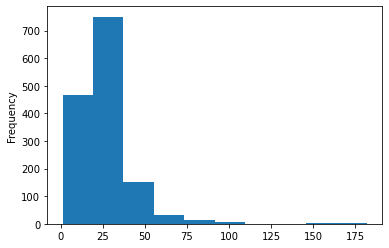

In [4]:
df['tumor_size'].plot(kind='hist')

**Log Transformation of Numerical Features**

In [230]:
df[['overall_survival', 'overall_survival_months']]

,overall_survival,overall_survival_months
0,1,140.500000
1,1,84.633333
2,0,163.700000
3,1,164.933333
4,0,41.366667
...,...,...
1897,1,199.233333
1898,0,82.733333
1899,1,196.866667
1900,0,44.733333


**Discretization into <5 and >5 Years Survivability**

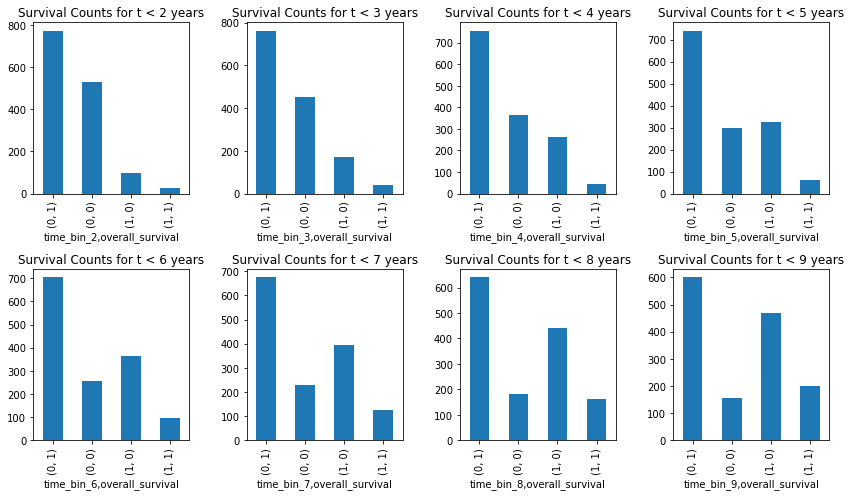

In [141]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 7))
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i in range(2, 10):
    df.groupby(f'time_bin_{i}')['overall_survival'].value_counts().plot(kind='bar', ax=ax_list[i-2])
    ax_list[i-2].set_title(f'Survival Counts for t < {i} years')

plt.tight_layout()

In [143]:
## assign time bins

col_list = ['overall_survival_months', 'time_bin_2', 
            'time_bin_3', 'time_bin_4', 'time_bin_5', 'time_bin_6', 
            'time_bin_7', 'time_bin_8', 'time_bin_9']

df_t2 = df[df[f'time_bin_2']==1].drop(columns=col_list)
df_t3 = df[df[f'time_bin_3']==1].drop(columns=col_list)
df_t4 = df[df[f'time_bin_4']==1].drop(columns=col_list)
df_t5 = df[df[f'time_bin_5']==1].drop(columns=col_list)
df_t6 = df[df[f'time_bin_6']==1].drop(columns=col_list)
df_t7 = df[df[f'time_bin_7']==1].drop(columns=col_list)
df_t8 = df[df[f'time_bin_8']==1].drop(columns=col_list)
df_t9 = df[df[f'time_bin_9']==1].drop(columns=col_list)

In [144]:
## check and filter collinearities among features

s_list = [0]

while len(s_list):
    col_list2 = df_t8.corr().columns
    series_dict = {}

    for col in col_list2:
        x = corr.sort_values(by=col, ascending=False)[col].iloc[1:2]
        if x.values > 0.6:
            series_dict[col] = x.index[0]

    unique = set(series_dict.keys()) -set(series_dict.values())
    duplicates = set(series_dict.keys()) -  unique

    s_list =[series_dict[dup] for dup in duplicates if dup not in m] + list(unique)

    df_t2.drop(columns=s_list, inplace=True)
    df_t3.drop(columns=s_list, inplace=True)
    df_t4.drop(columns=s_list, inplace=True)
    df_t5.drop(columns=s_list, inplace=True)
    df_t6.drop(columns=s_list, inplace=True)
    df_t7.drop(columns=s_list, inplace=True)
    df_t8.drop(columns=s_list, inplace=True)
    df_t9.drop(columns=s_list, inplace=True)

In [145]:
## one-hot encode nominal features 

X_t2 = pd.get_dummies(df_t2.drop(columns='overall_survival'))
y_t2 = df_t2['overall_survival']

X_t3 = pd.get_dummies(df_t3.drop(columns='overall_survival'))
y_t3 = df_t3['overall_survival']

X_t4 = pd.get_dummies(df_t4.drop(columns='overall_survival'))
y_t4 = df_t4['overall_survival']

X_t5 = pd.get_dummies(df_t5.drop(columns='overall_survival'))
y_t5 = df_t5['overall_survival']

X_t6 = pd.get_dummies(df_t6.drop(columns='overall_survival'))
y_t6 = df_t6['overall_survival']

X_t7 = pd.get_dummies(df_t7.drop(columns='overall_survival'))
y_t7 = df_t7['overall_survival']

X_t8 = pd.get_dummies(df_t8.drop(columns='overall_survival'))
y_t8 = df_t8['overall_survival']

X_t9 = pd.get_dummies(df_t9.drop(columns='overall_survival'))
y_t9 = df_t9['overall_survival']

In [146]:
## dimensionality reduction by Singuar Value Decomposition

def truncated_svd(X):
    '''Reduce dimensionality of TFIDF Matrix.'''
    q, s, p = np.linalg.svd(X)
    return q, np.diag(s), p.T, s**2/np.linalg.norm(s**2, 1)

q, s, p, nssd = [], [], [], []

X = [X_t2, X_t3, X_t4, X_t5, X_t6, X_t7, X_t8, X_t9]

for x in X:
    qx, sx, px, nssdx = truncated_svd(x)
    q.append(qx)
    s.append(sx)
    p.append(px)
    nssd.append(nssdx)

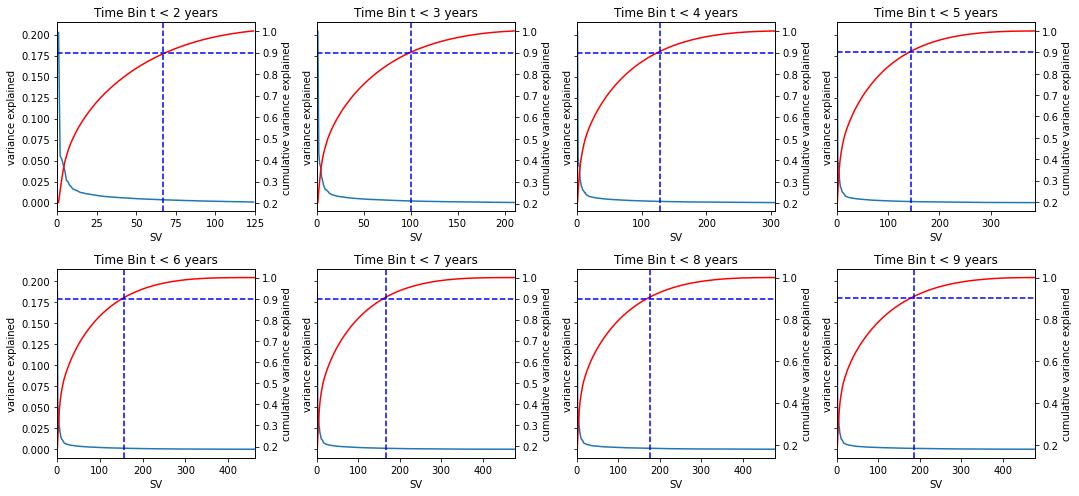

In [147]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

svs = [67, 100, 128, 145, 157, 167, 177, 185]

for i in range(8):
    ax_list[i].plot(range(1, len(nssd[i])+1), nssd[i], '-', label='individual')
    ax_list[i].set_xlim(0, len(nssd[i])+1)
    ax_list[i].set_xlabel('SV')
    ax_list[i].set_ylabel('variance explained')
    ax_list[i] = ax_list[i].twinx()
    ax_list[i].plot(range(1, len(nssd[i])+1), nssd[i].cumsum(), 'r-', label='cumulative')
    ax_list[i].axhline(0.9, ls='--', color='b')
    ax_list[i].set_ylabel('cumulative variance explained')
    ax_list[i].axvline(svs[i], ls='--', color='b')
    ax_list[i].set_title(f'Time Bin t < {i+2} years')

plt.tight_layout();

In [137]:
# nssd_all

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(range(1, len(nssd_all)+1), nssd_all, '-', label='individual')
# ax.set_xlim(0, len(nssd_all)+1)
# ax.set_xlabel('SV')
# ax.set_ylabel('variance explained')
# ax = ax.twinx()
# ax.plot(range(1, len(nssd_all)+1), nssd_all.cumsum(), 'r-', label='cumulative')
# ax.axhline(0.9, ls='--', color='b')
# ax.set_ylabel('cumulative variance explained')
# ax.axvline(218, ls='--', color='b')
# ax.set_ylim(0)
# X_all_svd = TruncatedSVD(n_components=218).fit_transform(X_all)

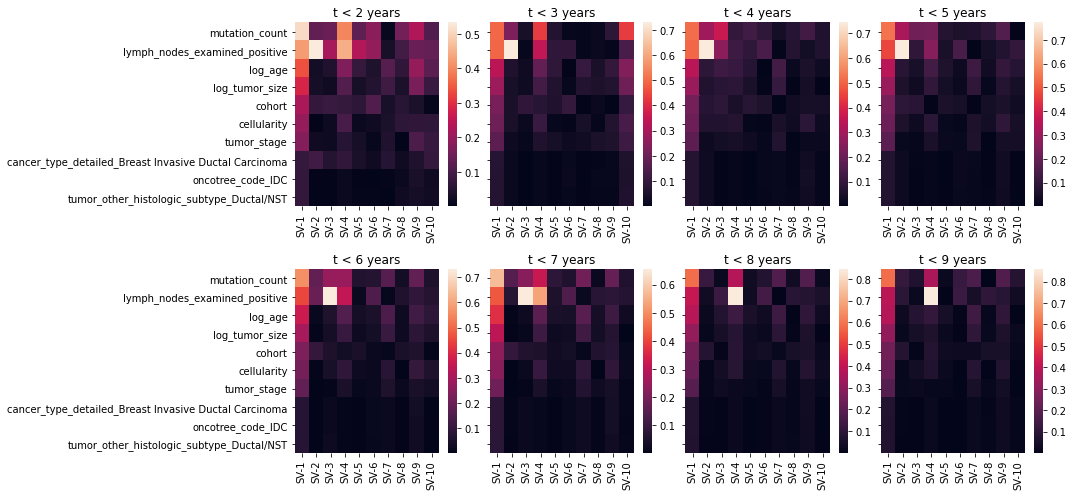

In [150]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

X_reduced = []

for i in range(8):
    svd = TruncatedSVD(n_components=svs[i]).fit(X[i])
    X_reduced.append(svd.transform(X[i]))
    I = np.identity(X[i].shape[1])
    weights = pd.DataFrame(svd.transform(I), index=X[i].columns)
    weights.columns = [f'SV-{i+1}' for i in weights.columns]
    weights = weights.transform(np.abs).copy()
    sns.heatmap(weights.sort_values(by='SV-1', ascending=False).iloc[:10, :10], 
                ax=ax_list[i])
    ax_list[i].set_title(f't < {i+2} years')

plt.tight_layout()

In [21]:
X_reduced[0].shape
y_t2.shape

(124,)

**Run Logististic Regression Classifier**

In [152]:
## run logistic regression classifier

logic_t2 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045], 
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[0], y_t2)
prob_t2 = pd.DataFrame(logic_t2.predict_proba(X_reduced[0]))
prob_t2['actual'] = list(y_t2)
prob_t2['pred'] = logic_t2.predict(X_reduced[0])

mean_t2, std_t2 = np.mean(logic_t2.scores_[1]), np.std(logic_t2.scores_[1])


logic_t3 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045], 
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[1], y_t3)
prob_t3 = pd.DataFrame(logic_t3.predict_proba(X_reduced[1]))
prob_t3['actual'] = list(y_t3)
prob_t3['pred'] = logic_t3.predict(X_reduced[1])
mean_t3, std_t3 = np.mean(logic_t3.scores_[1]), np.std(logic_t3.scores_[1])


logic_t4 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[2], y_t4)
prob_t4 = pd.DataFrame(logic_t4.predict_proba(X_reduced[2]))
prob_t4['actual'] = list(y_t4)
prob_t4['pred'] = logic_t4.predict(X_reduced[2])
mean_t4, std_t4 = np.mean(logic_t4.scores_[1]), np.std(logic_t4.scores_[1])


logic_t5 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[3], y_t5)
prob_t5 = pd.DataFrame(logic_t5.predict_proba(X_reduced[3]))
prob_t5['actual'] = list(y_t5)
prob_t5['pred'] = logic_t5.predict(X_reduced[3])
mean_t5, std_t5 = np.mean(logic_t5.scores_[1]), np.std(logic_t5.scores_[1])


logic_t6 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[4], y_t6)
prob_t6 = pd.DataFrame(logic_t6.predict_proba(X_reduced[4]))
prob_t6['actual'] = list(y_t6)
prob_t6['pred'] = logic_t6.predict(X_reduced[4])
mean_t6, std_t6 = np.mean(logic_t6.scores_[1]), np.std(logic_t6.scores_[1])


logic_t7 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[5], y_t7)
prob_t7 = pd.DataFrame(logic_t7.predict_proba(X_reduced[5]))
prob_t7['actual'] = list(y_t7)
prob_t7['pred'] = logic_t7.predict(X_reduced[5])
mean_t7, std_t7 = np.mean(logic_t7.scores_[1]), np.std(logic_t7.scores_[1])


logic_t8 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[6], y_t8)
prob_t8 = pd.DataFrame(logic_t8.predict_proba(X_reduced[6]))
prob_t8['actual'] = list(y_t8)
prob_t8['pred'] = logic_t8.predict(X_reduced[6])
mean_t8, std_t8 = np.mean(logic_t8.scores_[1]), np.std(logic_t8.scores_[1])


logic_t9 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[7], y_t9)
prob_t9 = pd.DataFrame(logic_t9.predict_proba(X_reduced[7]))
prob_t9['actual'] = list(y_t9)
prob_t9['pred'] = logic_t9.predict(X_reduced[7])
mean_t9, std_t9 = np.mean(logic_t9.scores_[1]), np.std(logic_t9.scores_[1])

In [153]:
# logic_all = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
#                                 cv=20, scoring='roc_auc', penalty='l2', 
#                              solver='liblinear', max_iter=1000, n_jobs=-1).fit(X_all_svd, y_all)
# prob_all = pd.DataFrame(logic_all.predict_proba(X_all_svd))
# prob_all['actual'] = list(y_all)
# prob_all['pred'] = logic_all.predict(X_all_svd)
# mean_all, std_all = np.mean(logic_all.scores_[1]), np.std(logic_all.scores_[1])

In [154]:
## combine results to the raw data

results_t2 = pd.concat([X_t2.reset_index(drop=True), prob_t2], axis=1)
results_t3 = pd.concat([X_t3.reset_index(drop=True), prob_t3], axis=1)
results_t4 = pd.concat([X_t4.reset_index(drop=True), prob_t4], axis=1)
results_t5 = pd.concat([X_t5.reset_index(drop=True), prob_t5], axis=1)
results_t6 = pd.concat([X_t6.reset_index(drop=True), prob_t6], axis=1)
results_t7 = pd.concat([X_t7.reset_index(drop=True), prob_t7], axis=1)
results_t8 = pd.concat([X_t8.reset_index(drop=True), prob_t8], axis=1)
results_t9 = pd.concat([X_t9.reset_index(drop=True), prob_t9], axis=1)

In [ ]:
# results_all = pd.concat([X_all.reset_index(drop=True), prob_all], axis=1)
# results_t8

In [ ]:
# results_t8.to_csv('results_t8.csv')
# results_t7.to_csv('results_t7.csv')
# results_t6.to_csv('results_t6.csv')
# results_t5.to_csv('results_t5.csv')
# results_t4.to_csv('results_t4.csv')
# results_t3.to_csv('results_t3.csv')
# results_t2.to_csv('results_t2.csv')
# # results_t8.to_csv('results_t8')

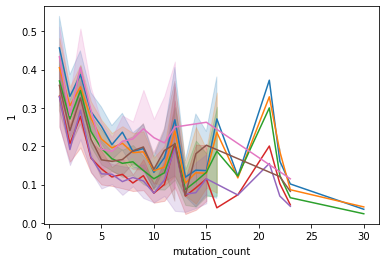

In [58]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1,1)
# sns.boxplot(x='mutation_count', y=1, data=results_t2, ax=ax)
sns.lineplot(x='mutation_count', y=1, data=results_t8, ax=ax)
sns.lineplot(x='mutation_count', y=1, data=results_t7, ax=ax)
sns.lineplot(x='mutation_count', y=1, data=results_t6, ax=ax)
sns.lineplot(x='mutation_count', y=1, data=results_t5, ax=ax)

sns.lineplot(x='mutation_count', y=1, data=results_t4, ax=ax)
sns.lineplot(x='mutation_count', y=1, data=results_t3, ax=ax)
sns.lineplot(x='mutation_count', y=1, data=results_t2, ax=ax)
# sns.lineplot(x='mutation_count', y=1, data=results_t1, ax=ax)

# ax.xaxis.set_major_locator(MultipleLocator(3))

# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 1))
# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# ax.set_xticklabels([2, 5, 10, 15, 20, 25])

In [149]:
# sns.lineplot(x='mutation_count', y=1, data=results_all)

In [155]:
# fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

# ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# results_t2[['lymph_nodes_examined_positive', 1]].pivot(columns='lymph_nodes_examined_positive', values=1).plot(kind='box', ax=ax1)
# results_t2[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean().plot(kind='line', ax=ax1)

# results_t3[['lymph_nodes_examined_positive', 1]].pivot(columns='lymph_nodes_examined_positive', values=1).plot(kind='box', ax=ax2)
# results_t3[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean().plot(kind='line', ax=ax2)

# results_t4[['lymph_nodes_examined_positive', 1]].pivot(columns='lymph_nodes_examined_positive', values=1).plot(kind='box', ax=ax3)
# results_t4[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean().plot(kind='line', ax=ax3)

# results_t5[['lymph_nodes_examined_positive', 1]].pivot(columns='lymph_nodes_examined_positive', values=1).plot(kind='box', ax=ax4)
# results_t5[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean().plot(kind='line', ax=ax4)

# results_t6[['lymph_nodes_examined_positive', 1]].pivot(columns='lymph_nodes_examined_positive', values=1).plot(kind='box', ax=ax5)
# results_t6[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean().plot(kind='line', ax=ax5)

# results_t7[['lymph_nodes_examined_positive', 1]].pivot(columns='lymph_nodes_examined_positive', values=1).plot(kind='box', ax=ax6)
# results_t7[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean().plot(kind='line', ax=ax6)

# results_t8[['lymph_nodes_examined_positive', 1]].pivot(columns='lymph_nodes_examined_positive', values=1).plot(kind='box', ax=ax7)
# results_t8[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean().plot(kind='line', ax=ax7)

In [263]:
df_mc = pd.concat([results_t2[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t3[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t4[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t5[['mutation_count', 1]].groupby('mutation_count').mean(), 
results_t6[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t7[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t8[['mutation_count', 1]].groupby('mutation_count').mean()], axis=1)
df_mc.columns = ['less than 2 years', 'less than 3 years', 'less than 4 years', 
              'less than 5 years', 'less than 6 years', 'less than 7 years',
             'less than 8 years']
# fig, ax = plt.subplots()
# for i in range(2, 9):
#     sns.lineplot(x=df.index, y=df[f'less than {i} years'], data=df, ax=ax)

# sns.lineplot(x=df.index, y=df['less than 3 years'], data=df, ax=ax)

# sns.lineplot(x=df.index, y=df['less than 4 years'], data=df, ax=ax)

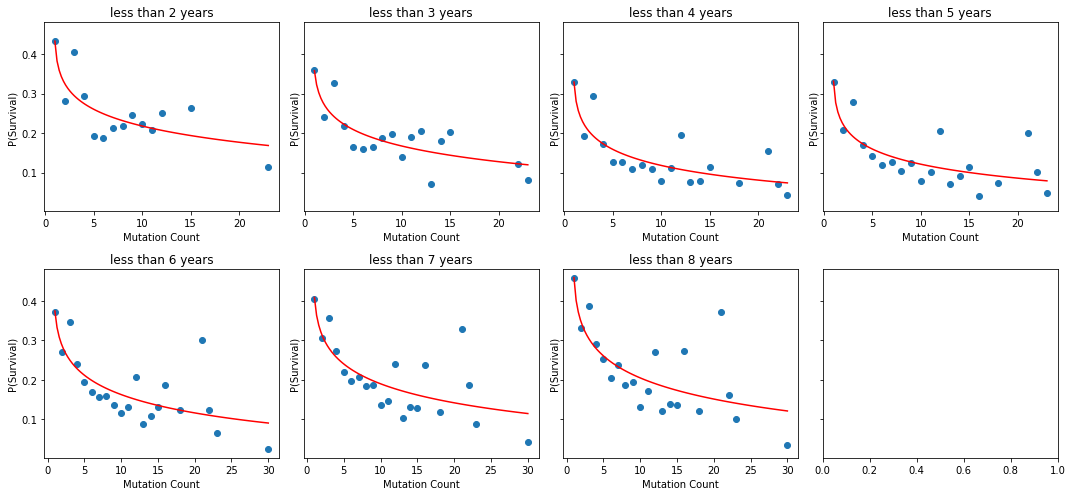

In [338]:
from scipy.stats import gamma

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

def gamma_cdf(x, a, s, l):
    return 1 - gamma.cdf(x, a=a, loc=l, scale=s)

ssr_list_mc = []
popt_list_mc = []

for i in range(2, 9):
    x = df_mc[f'less than {i} years'].dropna().index.values
    y = df_mc[f'less than {i} years'].dropna().values
    
    popt, pcov = curve_fit(gamma_cdf, x, y, p0 = [1, 1, 0])

    ssr_list_mc.append(sum((y - gamma_cdf(x, *popt))**2))
    popt_list_mc.append(popt)
    
    x_range = np.linspace(min(x), max(x), 100)

    ax_list[i-2].plot(x_range, gamma_cdf(x_range, *popt), 'r-')
    ax_list[i-2].scatter(x, y)
    ax_list[i-2].set_title(f"less than {i} years")
    ax_list[i-2].set_xlabel('Mutation Count')
    ax_list[i-2].set_ylabel('P(Survival)')
    
plt.tight_layout()

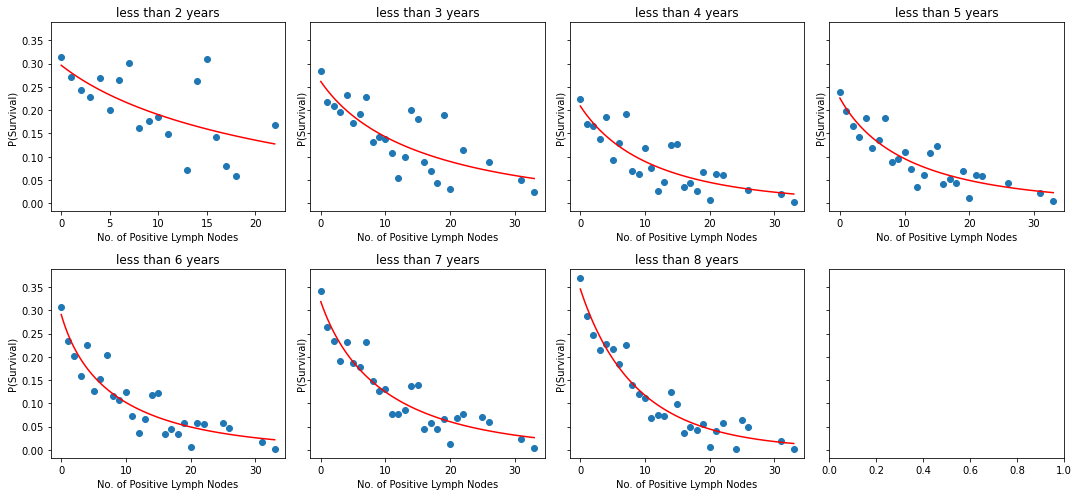

In [569]:

df_ln = pd.concat([results_t2[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t3[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t4[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t5[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(), 
results_t6[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t7[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t8[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean()], axis=1)
df_ln.columns = ['less than 2 years', 'less than 3 years', 'less than 4 years', 
              'less than 5 years', 'less than 6 years', 'less than 7 years',
             'less than 8 years']

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]


ssr_list_ln = []
popt_list_ln = []

for i in range(2, 9):
    x = df_ln[f'less than {i} years'].dropna().index.values
    y = df_ln[f'less than {i} years'].dropna().values
    
    popt, pcov = curve_fit(gamma_cdf, x, y, p0 = [1, 1, 0])

    ssr_list_ln.append(sum((y - gamma_cdf(x, *popt))**2))
    popt_list_ln.append(popt)
    
    x_range = np.linspace(min(x), max(x), 100)

    ax_list[i-2].plot(x_range, gamma_cdf(x_range, *popt), 'r-')
    ax_list[i-2].scatter(x, y)
    ax_list[i-2].set_title(f"less than {i} years")
    ax_list[i-2].set_xlabel('No. of Positive Lymph Nodes')
    ax_list[i-2].set_ylabel('P(Survival)')
    
plt.tight_layout()

Text(0.5, 0, 'Mutation Count')

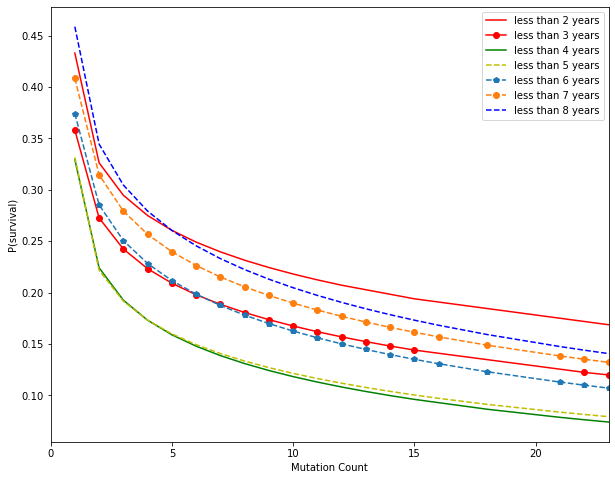

In [340]:
style = ['r-', 'ro-', 'g-', 'y--', 'p--', 'o--', 'b--', 'r--']
fig, ax = plt.subplots(figsize=(10,8))
for i in range(2, 9):
    ax.plot(df_mc[f'less than {i} years'].dropna().index.values, 
                gamma_cdf(df_mc[f'less than {i} years'].dropna().index.values, 
                          popt_list_mc[i-2][0], popt_list_mc[i-2][1], 
                          popt_list_mc[i-2][2]), style[i-2], label=f'less than {i} years')
#     ax.set_label(f'less than {i} years')
    
ax.legend()
ax.set_xlim(0, 23)

ax.set_ylabel('P(survival)')
ax.set_xlabel('Mutation Count')

Text(0.5, 0, 'No. of Positive Nodes')

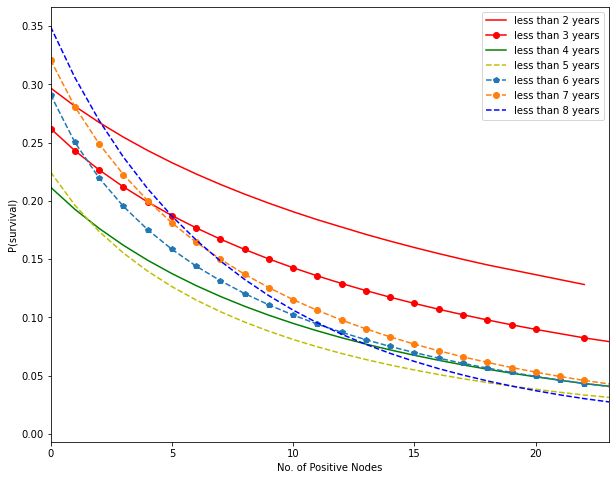

In [378]:

style = ['r-', 'ro-', 'g-', 'y--', 'p--', 'o--', 'b--', 'r--']
fig, ax = plt.subplots(figsize=(10,8))
for i in range(2, 9):
    ax.plot(df_ln[f'less than {i} years'].dropna().index.values, 
                gamma_cdf(df_ln[f'less than {i} years'].dropna().index.values, 
                          popt_list_ln[i-2][0], popt_list_ln[i-2][1], 
                          popt_list_ln[i-2][2]), style[i-2], label=f'less than {i} years')
    
ax.legend()
ax.set_xlim(0, 23)

ax.set_ylabel('P(survival)')
ax.set_xlabel('No. of Positive Nodes')

In [ ]:
# df_mc['P(t=8)'] = df_mc.iloc[:, 6] - df_mc.iloc[:, 5]
# df_mc
i = 8

style = ['r*--', 'bo--', 'g--', 'y--', 'p--', 'o--', 'b--', 'r--']
def gamma_pdf(x, a, s, l):
    return gamma.pdf(x, a=a, loc=l, scale=s)

# df_mc.drop(columns='P(t=8)', inplace=True)
# df_mc.columns = list(range(2, 9))
# fig, ax = plt.subplots()

# for i in range(21):
#     x = df_mc.T.iloc[:, i].index
#     y = df_mc.T.iloc[:, i]
#     ax.plot(x, y, 'b--')
# len(df_mc.T.columns.to_list())
fig, ax = plt.subplots()
for i in range(2,9):
    ax.plot(df_ln[f'less than {i} years'].dropna().index.values, 
                    gamma_pdf(df_ln[f'less than {i} years'].dropna().index.values, 
                              popt_list_ln[i-2][0], popt_list_ln[i-2][1], 
                              popt_list_ln[i-2][2]), style[i-2], label=f'less than {i} years')
ax.legend()

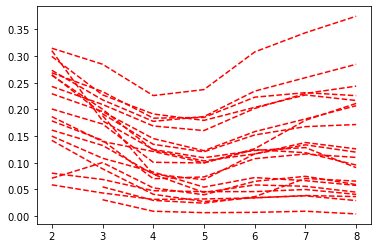

In [447]:
df_ln.columns = list(range(2,9))
df_ln.T
fig, ax = plt.subplots()

for i in range(21):
    x = df_ln.T.iloc[:, i].index
    y = df_ln.T.iloc[:, i]
    ax.plot(x, y, 'r--')

In [466]:
results_t8['time'] = 8
results_t7['time'] = 7
results_t6['time'] = 6
results_t5['time'] = 5
results_t4['time'] = 4
results_t3['time'] = 3
results_t2['time'] = 2
all_results = pd.concat([results_t2.reset_index(), results_t3.reset_index(), 
                         results_t4.reset_index(), results_t5.reset_index(), 
                         results_t6.reset_index(),
                       results_t7.reset_index(), results_t8.reset_index()], axis=0)
all_results.drop(columns=['her2_status_measured_by_snp6_UNDEF', 
                          'tumor_other_histologic_subtype_Tubular/ cribriform'], 
                 inplace=True)
# all_results.fillna(0, inplace=True)
# all_results

,index,cellularity,chemotherapy,cohort,hormone_therapy,lymph_nodes_examined_positive,mutation_count,radio_therapy,tumor_stage,brca1,...,pr_status_Positive,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,0,1,actual,pred,time
0,0,2.0,0,1.0,1,0.0,4.0,1,4.0,-0.4341,...,1,1,0,0,0,0.633579,0.366421,0,0,2
1,1,1.0,1,1.0,0,0.0,1.0,1,2.0,-0.8389,...,0,0,0,1,0,0.767639,0.232361,0,0,2
2,2,1.0,0,1.0,1,0.0,3.0,0,2.0,0.4559,...,1,1,0,0,0,0.594869,0.405131,1,0,2
3,3,2.0,0,1.0,1,1.0,2.0,1,2.0,-0.6118,...,0,0,1,0,0,0.551802,0.448198,1,0,2
4,4,1.0,0,1.0,1,0.0,3.0,0,2.0,0.8734,...,1,0,1,0,0,0.378065,0.621935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,3.0,0,4.0,1,8.0,2.0,1,2.0,0.4984,...,0,1,0,0,0,0.827048,0.172952,0,0,8
596,596,3.0,0,4.0,1,22.0,4.0,0,2.0,-0.6515,...,0,0,0,0,1,0.963428,0.036572,0,0,8
597,597,3.0,0,4.0,1,1.0,3.0,1,2.0,2.8894,...,1,1,0,0,0,0.768302,0.231698,0,0,8
598,598,3.0,0,4.0,1,1.0,2.0,0,2.0,0.9244,...,1,1,0,0,0,0.675825,0.324175,0,0,8


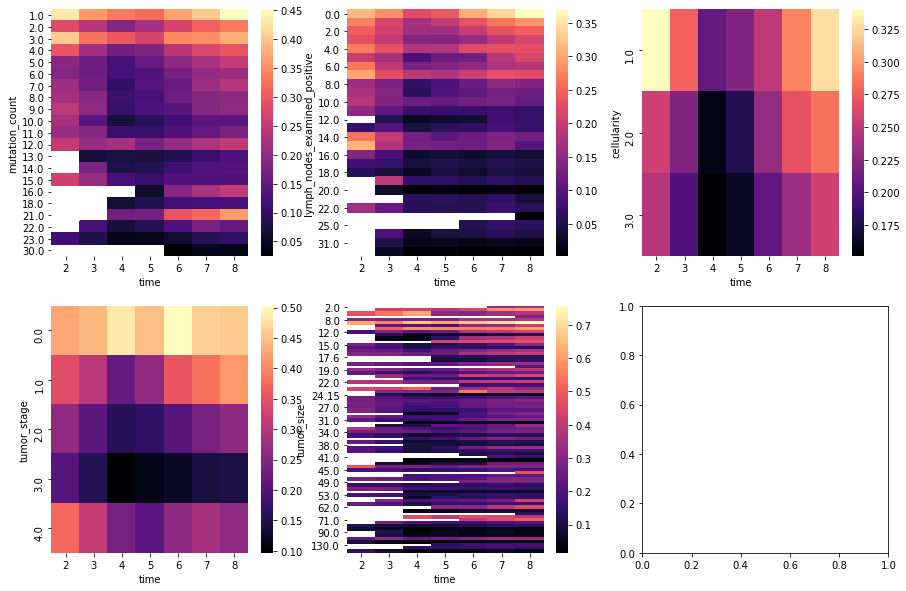

In [517]:

# mc['time'] = mc['time_2'] + mc['time_3'] + mc['time_4'] + mc['time_5'] 
# + mc['time_6'] + mc['time_7'] + mc['time_8']
# mc = all_results[['time', 1, 'mutation_count']]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))
sns.heatmap(mc.pivot_table(columns='time', index='mutation_count', values=1), cmap='magma', ax=ax1)

ln = all_results[['time', 1, 'lymph_nodes_examined_positive']]
sns.heatmap(ln.pivot_table(columns='time', index='lymph_nodes_examined_positive', values=1), cmap='magma', ax=ax2)


cell = all_results[['time', 1, 'cellularity']]
sns.heatmap(cell.pivot_table(columns='time', index='cellularity', values=1), cmap='magma', ax=ax3)


cell = all_results[['time', 1, 'tumor_stage']]
sns.heatmap(cell.pivot_table(columns='time', index='tumor_stage', values=1), cmap='magma', ax=ax4)
# all_results['age'] = np.exp(all_results['log_age'])-1
# all_results[['age', 1, 'time']][all_results['time']==2].drop(columns='time').plot(kind='scatter', x='age', y=1, ax=ax5)


# ts = all_results[['time', 1, 'log_tumor_size']]
# sns.heatmap(ts.pivot_table(columns='time', index='log_tumor_size', values=1), cmap='magma', ax=ax5)

all_results['tumor_size'] = np.round(np.exp(all_results['log_tumor_size']), 2)-1

ts = all_results[['time', 1, 'tumor_size']]
sns.heatmap(ts.pivot_table(columns='time', index='tumor_size', values=1), cmap='magma', ax=ax5)

In [534]:
all_results_ = all_results[[1, 'time']].pivot(columns='time')
all_results_['P8'] = all_results_[(1,8)] - all_results_[(1,7)]
all_results_['P7'] = all_results_[(1,7)] - all_results_[(1,6)]

all_results_['P6'] = all_results_[(1,6)] - all_results_[(1,5)]

all_results_['P5'] = all_results_[(1,5)] - all_results_[(1,4)]

all_results_['P4'] = all_results_[(1,4)] - all_results_[(1,3)]

all_results_['P3'] = all_results_[(1,3)] - all_results_[(1,2)]

# all_results['P3'] = all_results[3] - all_results[2]
all_results_

1                                                              \
time         2         3         4         5         6         7         8   
0     0.366421  0.278596  0.106705  0.128575  0.170369  0.191381  0.747972   
1     0.232361  0.298112  0.157555  0.224996  0.278921  0.300791  0.162160   
2     0.405131  0.217448  0.155521  0.184289  0.209578  0.224717  0.290584   
3     0.448198  0.401480  0.208451  0.246136  0.611261  0.471850  0.191992   
4     0.621935  0.450242  0.141522  0.182517  0.389926  0.565544  0.561359   
..         ...       ...       ...       ...       ...       ...       ...   
595        NaN       NaN       NaN       NaN       NaN       NaN  0.172952   
596        NaN       NaN       NaN       NaN       NaN       NaN  0.036572   
597        NaN       NaN       NaN       NaN       NaN       NaN  0.231698   
598        NaN       NaN       NaN       NaN       NaN       NaN  0.324175   
599        NaN       NaN       NaN       NaN       NaN       NaN  0.124826   

            P8        P7        P6        P5        P4        P3  
time                                                              
0     0.556591  0.021012  0.041794  0.021870 -0.171891 -0.087825  
1    -0.138631  0.021871  0.053925  0.067440 -0.140557  0.065752  
2     0.065868  0.015138  0.025289  0.028768 -0.061927 -0.187682  
3    -0.279857 -0.139411  0.365125  0.037684 -0.193029 -0.046718  
4    -0.004185  0.175618  0.207409  0.040995 -0.308720 -0.171693  
..         ...       ...       ...       ...       ...       ...  
595        NaN       NaN       NaN       NaN       NaN       NaN  
596        NaN       NaN       NaN       NaN       NaN       NaN  
597        NaN       NaN       NaN       NaN       NaN       NaN  
598        NaN       NaN       NaN       NaN       NaN       NaN  
599        NaN       NaN       NaN       NaN       NaN       NaN  

[600 rows x 13 columns]

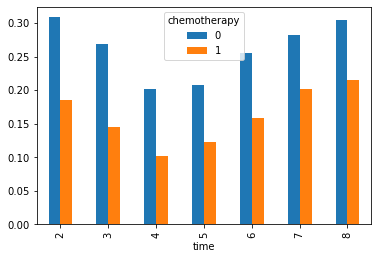

In [541]:
## Are those who had chemotherapy had higher chance of survival

all_results[['chemotherapy', 1, 'time']].pivot_table(index='time', columns='chemotherapy', values=1).plot(kind='bar')

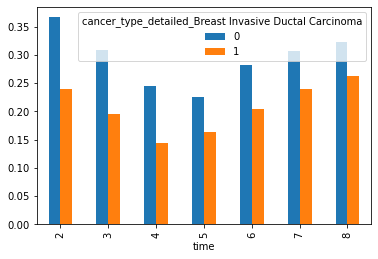

In [548]:
all_results['cancer_type_detailed_Breast Invasive Ductal Carcinoma']

all_results[['cancer_type_detailed_Breast Invasive Ductal Carcinoma', 
             1, 'time']].pivot_table(index='time', columns='cancer_type_detailed_Breast Invasive Ductal Carcinoma', values=1).plot(kind='bar')


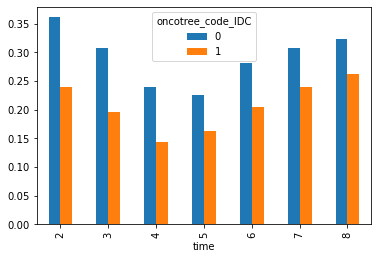

In [549]:

all_results[['oncotree_code_IDC', 
             1, 'time']].pivot_table(index='time', columns='oncotree_code_IDC', values=1).plot(kind='bar')


In [377]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # fig, ax = plt.subplots()
# for i in range(2, 9): 
#     X = df_ln[f'less than {i} years'].dropna().index.values
#     Y = gamma_cdf(df_ln[f'less than {i} years'].dropna().index.values, 
#                               popt_list_ln[i-2][0], popt_list_ln[i-2][1], 
#                               popt_list_ln[i-2][2])
#     Z = np.array([[2]])
#     # Axes3D.plot_surface(X=X, Y=Y, Z=Z)
#     ax.plot_wireframe(X,Y,Z, rstride=2, cstride=2)
    

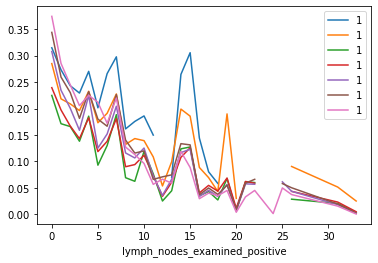

In [237]:
pd.concat([results_t2[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t3[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t4[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t5[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(), 
results_t6[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t7[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t8[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean()], axis=1).plot(kind='line')

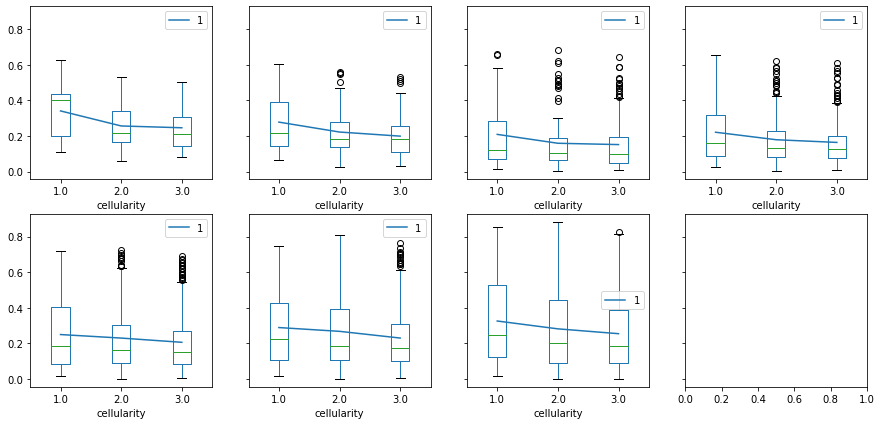

In [242]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
feat = 'cellularity'
results_t2 = pd.concat([X_t2.reset_index(drop=True), prob_t2], axis=1)
results_t2[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax1)
results_t2[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax1)

results_t3 = pd.concat([X_t3.reset_index(drop=True), prob_t3], axis=1)
results_t3[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax2)
results_t3[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax2)

results_t4 = pd.concat([X_t4.reset_index(drop=True), prob_t4], axis=1)
results_t4[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax3)
results_t4[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax3)

results_t5 = pd.concat([X_t5.reset_index(drop=True), prob_t5], axis=1)
results_t5[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax4)
results_t5[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax4)

results_t6 = pd.concat([X_t6.reset_index(drop=True), prob_t6], axis=1)
results_t6[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax5)
results_t6[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax5)

results_t7 = pd.concat([X_t7.reset_index(drop=True), prob_t7], axis=1)
results_t7[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax6)
results_t7[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax6)

results_t8 = pd.concat([X_t8.reset_index(drop=True), prob_t8], axis=1)
results_t8[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax7)
results_t8[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax7)

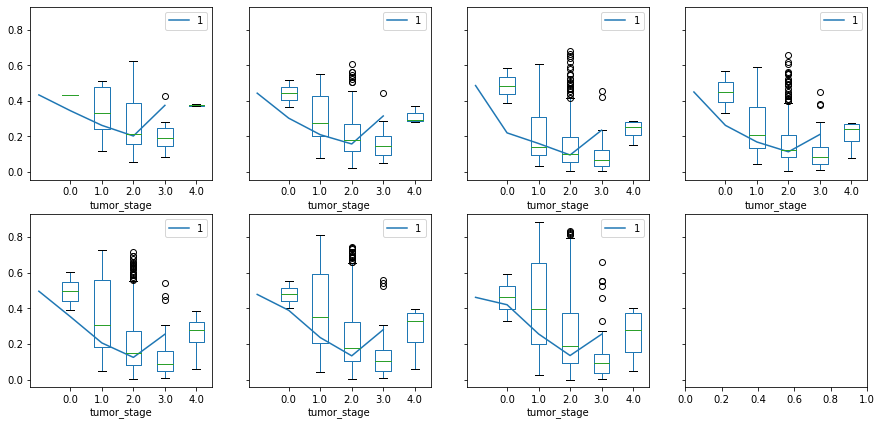

In [243]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
feat = 'tumor_stage'
results_t2 = pd.concat([X_t2.reset_index(drop=True), prob_t2], axis=1)
results_t2[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax1)
results_t2[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax1)

results_t3 = pd.concat([X_t3.reset_index(drop=True), prob_t3], axis=1)
results_t3[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax2)
results_t3[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax2)

results_t4 = pd.concat([X_t4.reset_index(drop=True), prob_t4], axis=1)
results_t4[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax3)
results_t4[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax3)

results_t5 = pd.concat([X_t5.reset_index(drop=True), prob_t5], axis=1)
results_t5[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax4)
results_t5[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax4)

results_t6 = pd.concat([X_t6.reset_index(drop=True), prob_t6], axis=1)
results_t6[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax5)
results_t6[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax5)

results_t7 = pd.concat([X_t7.reset_index(drop=True), prob_t7], axis=1)
results_t7[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax6)
results_t7[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax6)

results_t8 = pd.concat([X_t8.reset_index(drop=True), prob_t8], axis=1)
results_t8[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax7)
results_t8[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax7)

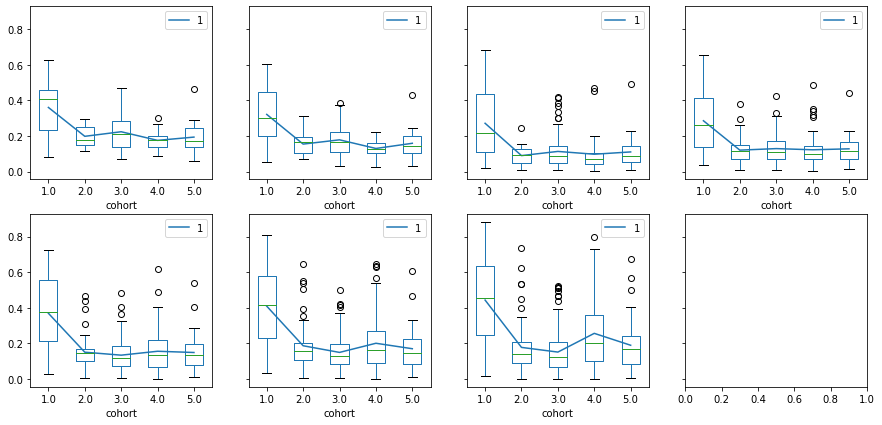

In [245]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
feat = 'cohort'
results_t2 = pd.concat([X_t2.reset_index(drop=True), prob_t2], axis=1)
results_t2[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax1)
results_t2[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax1)

results_t3 = pd.concat([X_t3.reset_index(drop=True), prob_t3], axis=1)
results_t3[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax2)
results_t3[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax2)

results_t4 = pd.concat([X_t4.reset_index(drop=True), prob_t4], axis=1)
results_t4[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax3)
results_t4[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax3)

results_t5 = pd.concat([X_t5.reset_index(drop=True), prob_t5], axis=1)
results_t5[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax4)
results_t5[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax4)

results_t6 = pd.concat([X_t6.reset_index(drop=True), prob_t6], axis=1)
results_t6[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax5)
results_t6[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax5)

results_t7 = pd.concat([X_t7.reset_index(drop=True), prob_t7], axis=1)
results_t7[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax6)
results_t7[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax6)

results_t8 = pd.concat([X_t8.reset_index(drop=True), prob_t8], axis=1)
results_t8[[feat, 1]].pivot(columns=feat, values=1).plot(kind='box', ax=ax7)
results_t8[[feat, 1]].groupby(feat).mean().plot(kind='line', ax=ax7)

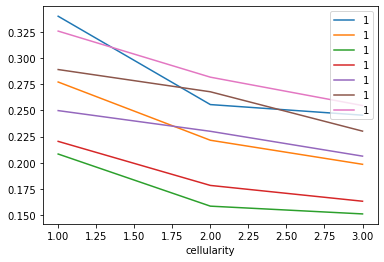

In [246]:
feat = 'cellularity'
pd.concat([results_t2[[feat, 1]].groupby(feat).mean(),
results_t3[[feat, 1]].groupby(feat).mean(),
results_t4[[feat, 1]].groupby(feat).mean(),
results_t5[[feat, 1]].groupby(feat).mean(), 
results_t6[[feat, 1]].groupby(feat).mean(),
results_t7[[feat, 1]].groupby(feat).mean(),
results_t8[[feat, 1]].groupby(feat).mean()], axis=1).plot(kind='line')

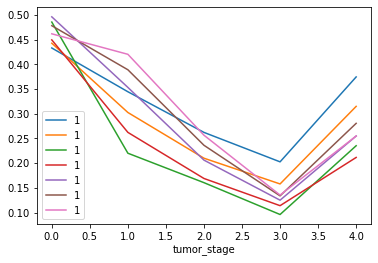

In [247]:
feat = 'tumor_stage'
pd.concat([results_t2[[feat, 1]].groupby(feat).mean(),
results_t3[[feat, 1]].groupby(feat).mean(),
results_t4[[feat, 1]].groupby(feat).mean(),
results_t5[[feat, 1]].groupby(feat).mean(), 
results_t6[[feat, 1]].groupby(feat).mean(),
results_t7[[feat, 1]].groupby(feat).mean(),
results_t8[[feat, 1]].groupby(feat).mean()], axis=1).plot(kind='line')

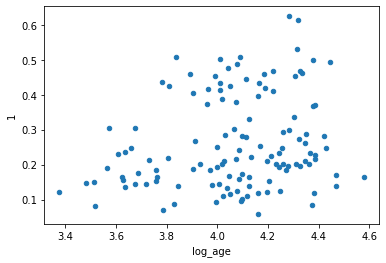

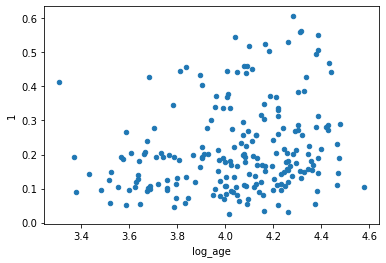

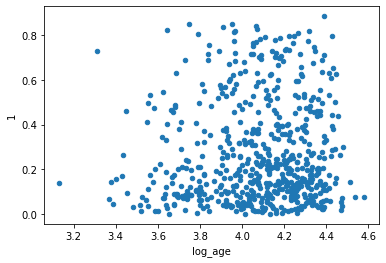

In [256]:
results_t2[['log_age', 1]].plot(kind='scatter', x='log_age', y=1)
results_t3[['log_age', 1]].plot(kind='scatter', x='log_age', y=1)
results_t8[['log_age', 1]].plot(kind='scatter', x='log_age', y=1)

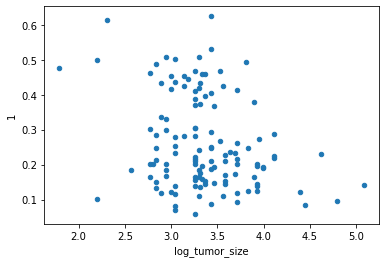

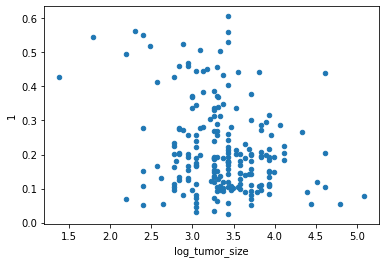

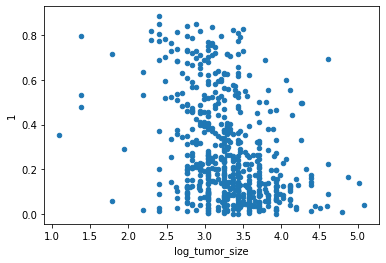

In [258]:
results_t2[['log_tumor_size', 1]].plot(kind='scatter', x='log_tumor_size', y=1)
results_t3[['log_tumor_size', 1]].plot(kind='scatter', x='log_tumor_size', y=1)
results_t8[['log_tumor_size', 1]].plot(kind='scatter', x='log_tumor_size', y=1)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



In [ ]:
## Do the same for other time  bins; time_bin = 3

df_3 = df[df['time_bin']==3].drop(columns='overall_survival_months')

## one-hot encode nominal features then assign features and target

features = pd.get_dummies(df_3.drop(columns='overall_survival'))
target = df_3['overall_survival']

## remove unimportant features using gradien boost regressor

gbr = GradientBoostingRegressor()
gbr.fit(features, target)
importance = gbr.feature_importances_
df_imp = pd.DataFrame({"IMPORTANCE":importance, 
            "VARIABLE":features.columns.to_list()}).sort_values("IMPORTANCE", 
            ascending=False)
features_reduced = features.drop(columns=df_imp[df_imp['IMPORTANCE']==0]['VARIABLE'].to_list())
## Scale the data

X_scaled = StandardScaler().fit_transform(features_reduced)
## Split into test and train

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=1)


In [ ]:
## Find optimum learning rate

gb_train_score = []
gb_test_score = []

gb_train_score_i, gb_test_score_i = 0, 0

for i in [0.01, 0.03, 0.05, 0.08, 0.1, 0.13]:
    gb_train_score.append(gb_train_score_i)
    gb_test_score.append(gb_test_score_i)
    gb_train_score_i = []
    gb_test_score_i = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=np.random.randint(100))
        gb = GradientBoostingClassifier(learning_rate=i, max_depth= 5, n_estimators=100, warm_start=True)
        gb.fit(X_train, y_train)
        gb_train_score_i.append(rf.score(X_train, y_train))
        gb_test_score_i.append(rf.score(X_test, y_test))

In [ ]:
mean_gb_train_score = [np.mean(list_) for list_ in gb_train_score[1:]]
mean_gb_test_score = [np.mean(list_) for list_ in gb_test_score[1:]]

In [ ]:
## Find optimummax_depth

gb_train_score = []
gb_test_score = []

gb_train_score_i, gb_test_score_i = 0, 0

for d in [3, 5, 7, 9, 10, 15, 20]:
    gb_train_score.append(gb_train_score_i)
    gb_test_score.append(gb_test_score_i)
    gb_train_score_i = []
    gb_test_score_i = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=np.random.randint(100))
        gb = GradientBoostingClassifier(learning_rate=0.08, max_depth= d, n_estimators=100, warm_start=True)
        gb.fit(X_train, y_train)
        gb_train_score_i.append(rf.score(X_train, y_train))
        gb_test_score_i.append(rf.score(X_test, y_test))

In [ ]:
mean_gb_train_score = [np.mean(list_) for list_ in gb_train_score[1:]]
mean_gb_test_score = [np.mean(list_) for list_ in gb_test_score[1:]]

In [ ]:
## Do the same for other time  bins; time_bin = 4

df_4 = df[df['time_bin']==4].drop(columns='overall_survival_months')

## one-hot encode nominal features then assign features and target

features = pd.get_dummies(df_4.drop(columns='overall_survival'))
target = df_4['overall_survival']

## remove unimportant features using gradien boost regressor

gbr = GradientBoostingRegressor()
gbr.fit(features, target)
importance = gbr.feature_importances_
df_imp = pd.DataFrame({"IMPORTANCE":importance, 
            "VARIABLE":features.columns.to_list()}).sort_values("IMPORTANCE", 
            ascending=False)
features_reduced = features.drop(columns=df_imp[df_imp['IMPORTANCE']==0]['VARIABLE'].to_list())
## Scale the data

X_scaled = StandardScaler().fit_transform(features_reduced)
## Split into test and train

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=1)


In [ ]:
## Find optimum learning rate

gb_train_score = []
gb_test_score = []

gb_train_score_i, gb_test_score_i = 0, 0

for i in [0.01, 0.03, 0.05, 0.08, 0.1, 0.13]:
    gb_train_score.append(gb_train_score_i)
    gb_test_score.append(gb_test_score_i)
    gb_train_score_i = []
    gb_test_score_i = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=np.random.randint(100))
        gb = GradientBoostingClassifier(learning_rate=i, max_depth= 5, n_estimators=100, warm_start=True)
        gb.fit(X_train, y_train)
        gb_train_score_i.append(rf.score(X_train, y_train))
        gb_test_score_i.append(rf.score(X_test, y_test))

In [ ]:
mean_gb_train_score = [np.mean(list_) for list_ in gb_train_score[1:]]
mean_gb_test_score = [np.mean(list_) for list_ in gb_test_score[1:]]

In [ ]:
## Find optimummax_depth

gb_train_score = []
gb_test_score = []

gb_train_score_i, gb_test_score_i = 0, 0

for d in [3, 5, 7, 9, 10, 15, 20]:
    gb_train_score.append(gb_train_score_i)
    gb_test_score.append(gb_test_score_i)
    gb_train_score_i = []
    gb_test_score_i = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=np.random.randint(100))
        gb = GradientBoostingClassifier(learning_rate=0.08, max_depth= d, n_estimators=100, warm_start=True)
        gb.fit(X_train, y_train)
        gb_train_score_i.append(rf.score(X_train, y_train))
        gb_test_score_i.append(rf.score(X_test, y_test))

In [ ]:
mean_gb_train_score = [np.mean(list_) for list_ in gb_train_score[1:]]
mean_gb_test_score = [np.mean(list_) for list_ in gb_test_score[1:]]